In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]


(720, 960)

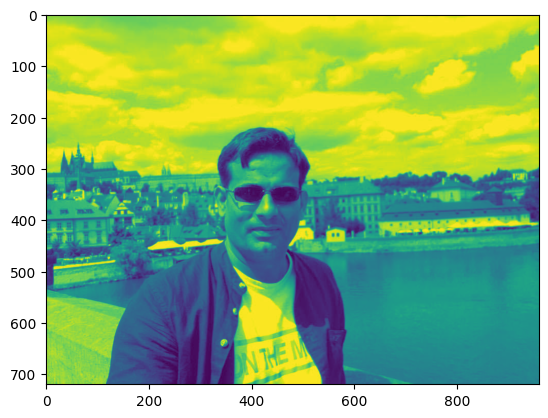

In [ ]:
#TODO : LOAD IMAGE
url = "https://channeli.in/api/django_filemanager/media_files/12069/"
myImg = io.imread(url)
gray_img = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_img), float)
print(img_mat)
img_mat.shape
plt.imshow(img_mat)
img_mat.shape

In [ ]:
#scale the image matrix before SVD
img_mat_scaled = (img_mat-img_mat.mean())/img_mat.std()

#perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled)

In [ ]:
#compute variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals = 3)

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'figsize'

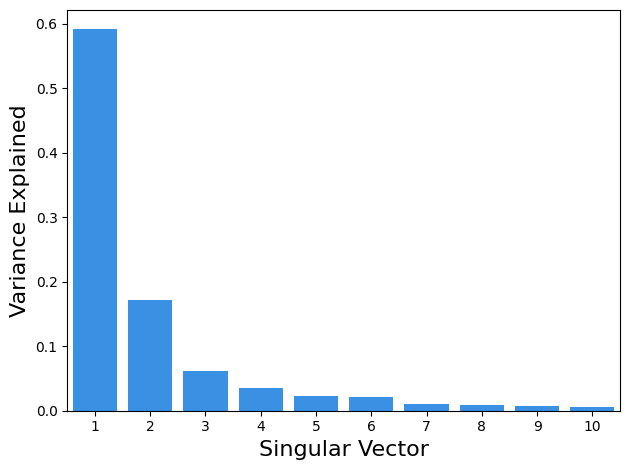

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,11)),
            y=var_explained[0:10], color ="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png', dpi=150, figsize=(8,8))
#plt.savefig("Line_Plot_with_Pandas_Python.jpg")

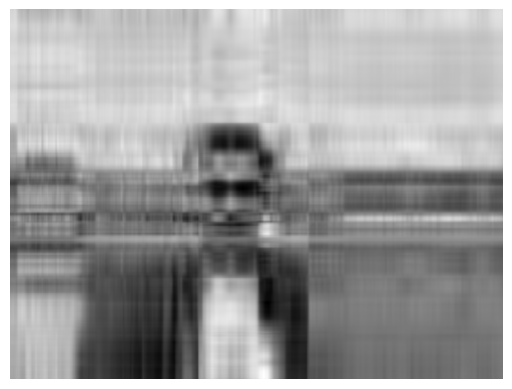

In [ ]:
num_components = 5
reconst_img_5 = U[:, :num_components] @ np.diag(s[:num_components]) @ V[:num_components, :]
plt.imshow(reconst_img_5, cmap='gray')
plt.axis('off')
plt.show()


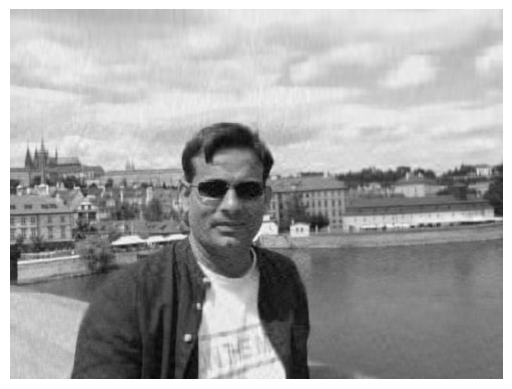

In [ ]:
num_components = 50
reconst_img_50 = U[:, :num_components] @ np.diag(s[:num_components]) @ V[:num_components, :]
plt.imshow(reconst_img_50, cmap='gray')
plt.axis('off')
plt.show()


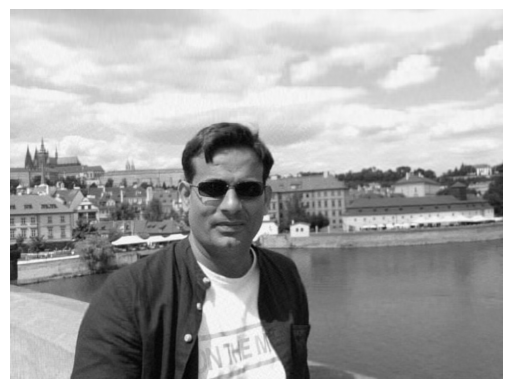

In [ ]:
num_components = 100
reconst_img_100 = U[:, :num_components] @ np.diag(s[:num_components]) @ V[:num_components, :]
plt.imshow(reconst_img_100, cmap='gray')
plt.axis('off')
plt.show()


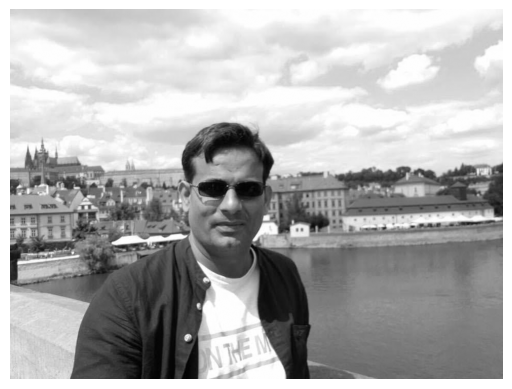

In [ ]:
num_components = 650
reconst_img_650 = U[:, :num_components] @ np.diag(s[:num_components]) @ V[:num_components, :]
plt.imshow(reconst_img_650, cmap='gray')
plt.axis('off')
plt.show()


(np.float64(-0.5), np.float64(959.5), np.float64(719.5), np.float64(-0.5))

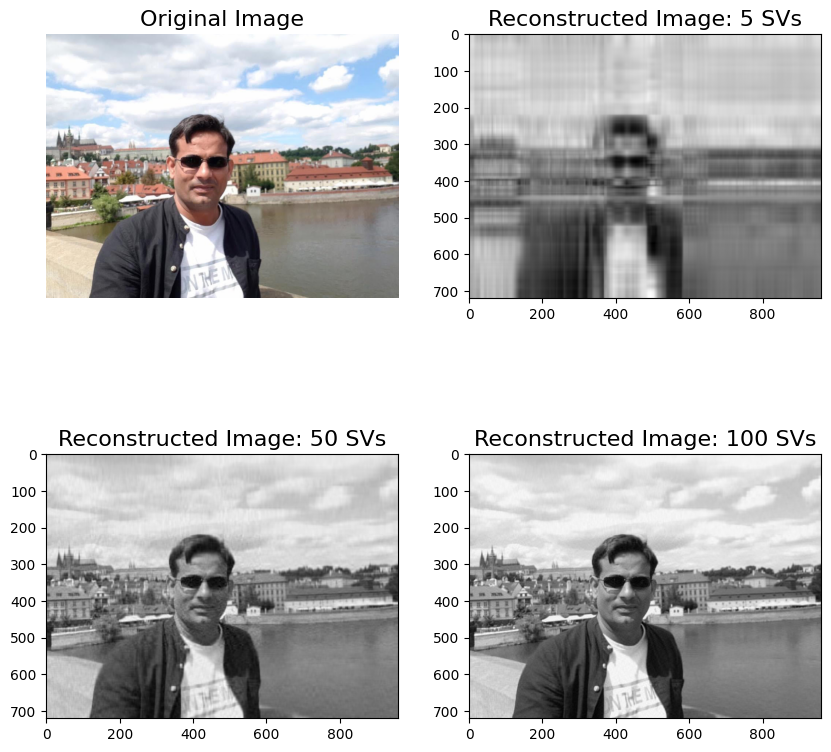

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(myImg, cmap='gray')
axs[0, 0].set_title('Original Image', size = 16)
axs[0, 1].imshow(reconst_img_5, cmap='gray')
axs[0, 1].set_title('Reconstructed Image: 5 SVs', size= 16)
axs[1, 0].imshow(reconst_img_50, cmap='gray')
axs[1, 0].set_title('Reconstructed Image: 50 SVs', size= 16)
axs[1, 1].imshow(reconst_img_100, cmap='gray')
axs[1, 1].set_title('Reconstructed Image: 100 SVs', size= 16)
axs[0, 0].axis('off')